# Naive Bayes Algorithm

## About the algorithm
### Working
    1. Joint probability  of each attribute’s values is calculated with the output variable.(likelihood for each value of each feature is calculated with respect to output class type.
    2. All the attributes should be independent to each other.
    3. For a given input X set of features, their respective probability multiplied along with the probability of each class. Input X will  be assigned to the class with highest probability.

### Pros
    1. Efficient compared to other classifiers when the attributes are independent to each other.
    2. It perform well in case of categorical input variables compared to numerical variable(s)
### Cons
    1. If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction.
    2. Computation will be difficult when each attributes take greater number of values.
    

## About Notebook

### Problem Statement
    Predict the quality of the red wine from 1-10 based on the acidity, pH, alcohol, etc.

### Dataset
    1. Dataset contains 12 feature and 1 class column.
    2. There are 1598 data points without any null values.
    3. Description of attributes:
       1.fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
       2.volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
       3.citric acid: found in small quantities, citric acid can add 'freshness' and flavour to wines.
       4.residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/litre and wines with greater than 45 grams/litre are considered sweet.
       5.chlorides: the amount of salt in the wine.
       6.free sulphur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfites ion; it prevents microbial growth and the oxidation of wine.
       7.total sulphur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
       8.density: the density of water is close to that of water depending on the percent alcohol and sugar content
       9.pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
        10.sulphates: a wine additive which can contribute to sulphur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
       11.alcohol: the percent alcohol content of the wine 
       12.quality (score between 0 and 10)

### Wha is done?
    1. Necessary modules are imported.
    2. data is loaded using pandas.
    3. To check the independency which is necessary for Naive Bayes theorem, Correlation is checked using heat-map
    4. Since the dataset is large, 500 data points are selected in random order.
    5. Attributes are stored in X and their respective class is stored in y.
    6. Data is divided into testing and training datasets with 80:20 ratio respectively.
    7. Bar graph is plotted to check the number class available in the test dataset.
    8. Model is built and tested with the test dataset.
    
### Output Interpretation
    1. Accuracy can be evaluated using confusion matrix. Which is a square matrix and its size depends on number of Classed
    2. Important Terminologies
        1. TN / True Negative: when a case was negative and predicted negative
        2. TP / True Positive: when a case was positive and predicted positive
        3. FN / False Negative: when a case was positive but predicted negative
        4. FP / False Positive: when a case was negative but predicted positive.
    3. Precession:
        1. Describes what percentage of your prediction were correct
        2. Precession = TP/(TP+FP)
    4. Recall:
        1. Describes what percentage of the positive cases did you catch.
        2. Recall = TP/(TP+FN)
    5. F1 Score
        1. Describe what percentage of the positive prediction were correct
        2. F1 Score = s((Recall*Precession)/(Recall+Precession))

In [3]:
#import necessary modules
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read the dataset from git
dataset = pa.read_csv(r'https://raw.githubusercontent.com/iamchiragshekars/Machine-Learning/master/Datasets/wineQualityReds.csv')

In [6]:
#verify the data is loaded correctly or not
dataset.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#check whether dataset contains any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [8]:
#get stats about dataset
dataset.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


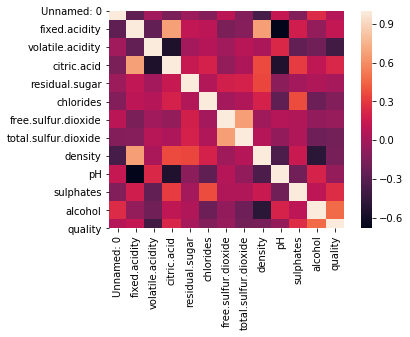

In [9]:
#Correlation heat map to check the independency between the attributes
sns.heatmap(dataset.corr(), vmax=1, square=True)

In [57]:
#divide the dataset into independent and target data set. randomly select 500 data point 
X = dataset.iloc[:,1:-1]
Y = dataset.iloc[:,-1]

random_number = np.random.randint(1,1558,500)

X = X.iloc[random_number]
Y = Y.iloc[random_number]

In [58]:
#dividing dataset into trainig and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

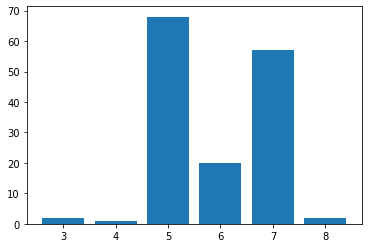

In [59]:
#visualize the number of classed in test dataset
plt.bar(y_test.unique(),y_test.value_counts())
plt.show()

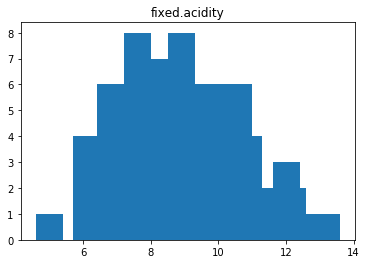

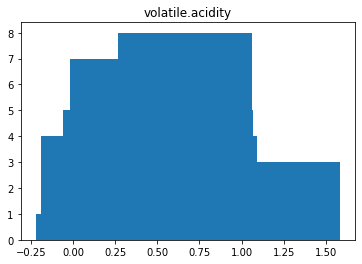

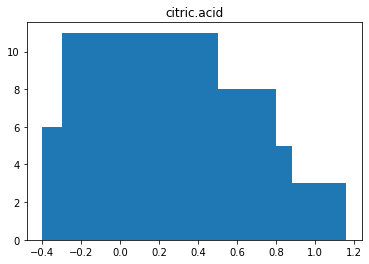

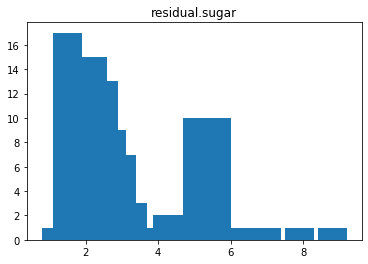

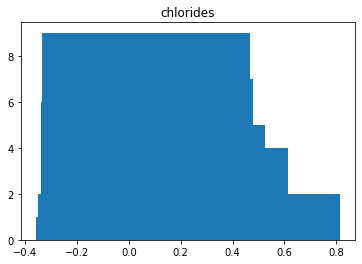

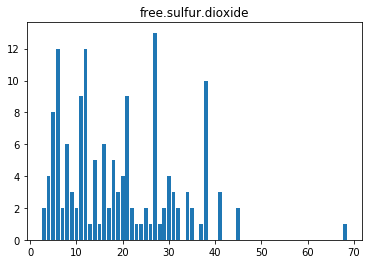

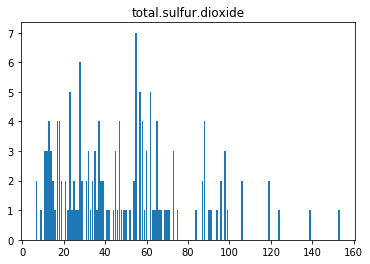

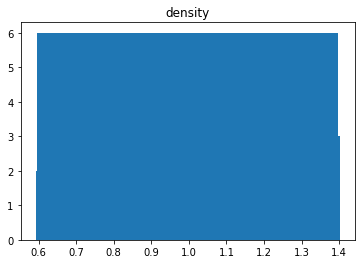

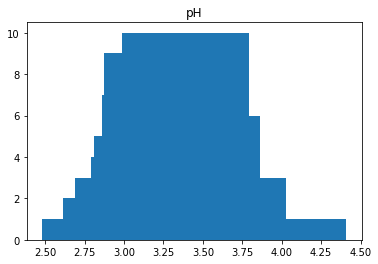

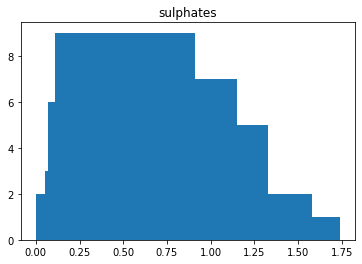

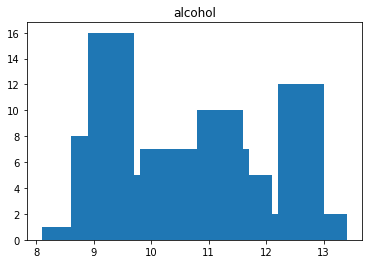

In [68]:
#visualize the number of values in each feature in the test dataset
for column in dataset.columns[1:-1]:
    plt.bar(X_test[column].unique(),X_test[column].value_counts())
    plt.title(column)
    plt.show()

In [63]:
#create and fit the model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [69]:
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# model accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.54


In [70]:
#report about the modle which describes the efficency
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  1  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  1 39 25  3  0]
 [ 0  2 18 35  2  0]
 [ 0  1  1  9  7  2]
 [ 0  0  0  1  1  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.65      0.57      0.61        68
           6       0.50      0.61      0.55        57
           7       0.54      0.35      0.42        20
           8       0.00      0.00      0.00         2

    accuracy                           0.54       150
   macro avg       0.28      0.26      0.26       150
weighted avg       0.56      0.54      0.54       150



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
